In [415]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [416]:
pd.set_option('display.max_columns', 500)

In [417]:
players = pd.read_csv('players_cleaned.csv', index_col=0)

In [418]:
teams = pd.read_csv('teams_cleaned.csv', index_col=0)

In [419]:
players.head()

,player_id,name,team,full_team,position,age,date,year,birth_date,birth_place,college,height,high_school,weight,field_goal_attempts,field_goal_makes,game_location,game_number,game_won,opponent,full_opponent,opponent_score,passing_attempts,passing_completions,passing_interceptions,passing_rating,passing_sacks,passing_sacks_yards_lost,passing_touchdowns,passing_yards,player_team_score,point_after_attemps,point_after_makes,receiving_receptions,receiving_targets,receiving_touchdowns,receiving_yards,rushing_attempts,rushing_touchdowns,rushing_yards,fp_receiving_touchdowns,fp_receiving_receptions,fp_receiving_yards,fp_rushing_touchdowns,fp_rushing_yards,fp_passing_touchdowns,fp_passing_yards,fp_passing_interceptions,fp_field_goal_makes,fp_point_after_makes,fp_field_goal_misses,fp_point_after_misses,fp_total
0,18182,Steve Ramsey,NOR,New Orleans Saints,QB,22-242,1970-12-20,1970,1948-04-22,"Dallas, TX",North Texas,6-2,"W.W. Samuell, TX",210.0,0,0,H,14,False,CHI,Chicago Bears,24,0,2,0,39.6,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0.00,0.00,0.0,0,0,0,0.00
1,18182,Steve Ramsey,DEN,Denver Broncos,QB,23-157,1971-09-26,1971,1948-04-22,"Dallas, TX",North Texas,6-2,"W.W. Samuell, TX",210.0,0,0,A,2,False,GNB,Green Bay Packers,34,7,8,0,142.2,0,0,1,69,13,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,4,2.76,0.00,0.0,0,0,0,6.76
2,18182,Steve Ramsey,DEN,Denver Broncos,QB,23-171,1971-10-10,1971,1948-04-22,"Dallas, TX",North Texas,6-2,"W.W. Samuell, TX",210.0,0,0,H,4,False,OAK,Oakland Raiders,27,6,16,2,40.1,0,0,1,98,16,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,4,3.92,0.08,0.0,0,0,0,8.00
3,18182,Steve Ramsey,DEN,Denver Broncos,QB,23-185,1971-10-24,1971,1948-04-22,"Dallas, TX",North Texas,6-2,"W.W. Samuell, TX",210.0,0,0,A,6,True,CLE,Cleveland Browns,0,0,0,0,0.0,0,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0.00,0.00,0.0,0,0,0,0.00
4,18182,Steve Ramsey,DEN,Denver Broncos,QB,23-206,1971-11-14,1971,1948-04-22,"Dallas, TX",North Texas,6-2,"W.W. Samuell, TX",210.0,0,0,H,9,False,CIN,Cincinnati Bengals,24,6,13,1,68.1,0,0,1,106,10,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,4,4.24,0.04,0.0,0,0,0,8.28


In [420]:
teams.head()

,datetime,Team,Season,year_of_game,week_of_season,game_of_season,day_of_week,Date,result,OT?,home_or_away,opponent,points_scored,opponent_points_scored,pass_completions,pass_attempts,pass_yards,passing_tds,interceptions,times_sacked,sack_yards_lost,passing_yards_per_attempt,completion_percentage,qb_rating,rushing_attempts,rushing_yards,rushing_yards_per_attempt,rushing_tds,FGM,FGA,XPM,XPA,punts,total_punt_yards,record,1stDowns,TotYd,turnovers_lost,1stDowns_allowed,TotYd_allowed,PassY_allowed,RushY_allowed,defensive_turnovers,W,L,T,win_pct,month,day,year
0,1994-09-11,Arizona Cardinals,1994,1994,1,1,Sun,September 4,L,No,@,Los Angeles Rams,12.000000,14.00,18.000000,40.000000,128.000000,1.000000,2.000000,4.00,30.000000,3.20,45.000000,40.40,32.000000,106.000000,3.300000,0.000000,2.0,2.000000,0.000000,0.000000,6.00,133.0,0-1-0,23.000000,234.00,3.00,9.0,152.000000,102.000000,50.000000,2.0,0,1,0,0.00,9,4,1994
1,1994-09-18,Arizona Cardinals,1994,1994,2,2,Sun,September 11,L,No,vs,New York Giants,14.500000,17.00,16.000000,33.500000,131.500000,1.000000,2.000000,3.50,26.500000,4.10,48.450000,44.00,24.000000,72.500000,2.850000,0.500000,1.5,1.500000,1.000000,1.000000,5.50,123.5,0-2-0,17.000000,204.00,3.00,14.0,179.000000,95.000000,84.000000,2.0,0,2,0,0.00,9,11,1994
2,1994-10-02,Arizona Cardinals,1994,1994,3,3,Sun,September 18,L,No,@,Cleveland Browns,9.666667,22.00,19.333333,41.666667,172.666667,0.666667,2.333333,3.00,22.333333,4.20,47.233333,41.40,21.666667,69.333333,3.133333,0.333333,1.0,1.666667,0.666667,0.666667,6.00,148.0,0-3-0,18.333333,242.00,3.00,15.0,226.666667,144.333333,82.333333,2.0,0,3,0,0.00,9,18,1994
3,1994-10-09,Arizona Cardinals,1994,1994,5,4,Sun,October 2,W,No,vs,Minnesota Vikings,11.500000,18.25,19.500000,40.250000,179.500000,0.750000,2.000000,2.75,22.000000,4.55,49.325000,48.35,23.750000,79.250000,3.250000,0.500000,1.0,1.750000,1.000000,1.000000,5.75,136.0,1-3-0,19.000000,258.75,2.75,16.0,259.500000,193.250000,66.250000,2.5,1,3,0,0.25,10,2,1994
4,1994-10-16,Arizona Cardinals,1994,1994,6,5,Sun,October 9,L,No,@,Dallas Cowboys,9.800000,22.20,18.800000,39.200000,177.200000,0.600000,2.600000,2.40,17.800000,4.60,48.600000,42.80,22.600000,74.000000,3.180000,0.400000,1.0,1.600000,0.800000,0.800000,5.60,129.2,1-4-0,17.200000,251.20,3.20,17.2,277.800000,209.200000,68.600000,2.0,1,4,0,0.20,10,9,1994


In [421]:
# pg stands for player-games (each observation is the game-stats for a player)
pg = players.merge(teams, how='left', left_on=['date', 'full_opponent'], right_on=['datetime',  'Team'])

In [422]:
pg.head()

,player_id,name,team,full_team,position,age,date,year_x,birth_date,birth_place,college,height,high_school,weight,field_goal_attempts,field_goal_makes,game_location,game_number,game_won,opponent_x,full_opponent,opponent_score,passing_attempts,passing_completions,passing_interceptions,passing_rating,passing_sacks,passing_sacks_yards_lost,passing_touchdowns,passing_yards,player_team_score,point_after_attemps,point_after_makes,receiving_receptions,receiving_targets,receiving_touchdowns,receiving_yards,rushing_attempts_x,rushing_touchdowns,rushing_yards_x,fp_receiving_touchdowns,fp_receiving_receptions,fp_receiving_yards,fp_rushing_touchdowns,fp_rushing_yards,fp_passing_touchdowns,fp_passing_yards,fp_passing_interceptions,fp_field_goal_makes,fp_point_after_makes,fp_field_goal_misses,fp_point_after_misses,fp_total,datetime,Team,Season,year_of_game,week_of_season,game_of_season,day_of_week,Date,result,OT?,home_or_away,opponent_y,points_scored,opponent_points_scored,pass_completions,pass_attempts,pass_yards,passing_tds,interceptions,times_sacked,sack_yards_lost,passing_yards_per_attempt,completion_percentage,qb_rating,rushing_attempts_y,rushing_yards_y,rushing_yards_per_attempt,rushing_tds,FGM,FGA,XPM,XPA,punts,total_punt_yards,record,1stDowns,TotYd,turnovers_lost,1stDowns_allowed,TotYd_allowed,PassY_allowed,RushY_allowed,defensive_turnovers,W,L,T,win_pct,month,day,year_y
0,18182,Steve Ramsey,NOR,New Orleans Saints,QB,22-242,1970-12-20,1970,1948-04-22,"Dallas, TX",North Texas,6-2,"W.W. Samuell, TX",210.0,0,0,H,14,False,CHI,Chicago Bears,24,0,2,0,39.6,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0.00,0.00,0.0,0,0,0,0.00,1970-12-20,Chicago Bears,1970.0,1970.0,13.0,13.0,Sun,December 13,W,No,vs,Green Bay Packers,17.846154,19.846154,14.153846,28.538462,146.230769,1.384615,1.384615,2.461538,19.230769,5.207692,48.576923,59.469231,25.615385,76.0,2.907692,0.230769,1.461538,2.461538,1.923077,1.923077,6.000,155.153846,5-8-0,12.307692,222.230769,2.384615,17.307692,298.153846,188.692308,109.461538,2.076923,5.0,8.0,0.0,0.384615,12.0,13.0,1970.0
1,18182,Steve Ramsey,DEN,Denver Broncos,QB,23-157,1971-09-26,1971,1948-04-22,"Dallas, TX",North Texas,6-2,"W.W. Samuell, TX",210.0,0,0,A,2,False,GNB,Green Bay Packers,34,7,8,0,142.2,0,0,1,69,13,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,4,2.76,0.00,0.0,0,0,0,6.76,1971-09-26,Green Bay Packers,1971.0,1971.0,1.0,1.0,Sun,September 19,L,No,vs,New York Giants,40.000000,42.000000,15.000000,26.000000,224.000000,3.000000,1.000000,0.000000,0.000000,8.600000,57.700000,108.500000,30.000000,124.0,4.100000,1.000000,1.000000,2.000000,5.000000,5.000000,4.000,56.000000,0-1-0,17.000000,348.000000,5.000000,12.000000,323.000000,221.000000,102.000000,1.000000,0.0,1.0,0.0,0.000000,9.0,19.0,1971.0
2,18182,Steve Ramsey,DEN,Denver Broncos,QB,23-171,1971-10-10,1971,1948-04-22,"Dallas, TX",North Texas,6-2,"W.W. Samuell, TX",210.0,0,0,H,4,False,OAK,Oakland Raiders,27,6,16,2,40.1,0,0,1,98,16,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,4,3.92,0.08,0.0,0,0,0,8.00,1971-10-10,Oakland Raiders,1971.0,1971.0,3.0,3.0,Mon,October 4,W,No,@,Cleveland Browns,24.666667,13.333333,11.333333,23.666667,140.666667,1.333333,0.666667,2.000000,18.666667,6.466667,50.366667,82.133333,34.333333,195.0,5.733333,1.666667,1.333333,1.666667,2.666667,2.666667,5.000,107.000000,2-1-0,20.000000,335.666667,2.333333,15.000000,273.666667,152.666667,121.000000,3.666667,2.0,1.0,0.0,0.666667,10.0,4.0,1971.0
3,18182,Steve Ramsey,DEN,Denver Broncos,QB,23-185,1971-10-24,1971,1948-04-22,"Dallas, TX",North Texas,6-2,"W.W. Samuell, TX",210.0,0,0,A,6,True,CLE,Cleveland Browns,0,0,0,0,0.0,0,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0.00,0.00,0.0,0,0,0,0.00,1971-10-24,Cleveland Browns,1971.0,1971.0,5.0,5.0,Sun,October 17,W,No,@,Cincinnati Bengals,23.800000,17.600000,16.600000,30.600000,204.000000,1.000000,1.600000,1.400000,13.000000,6.700000,54.980000,63.440000,36.600000,115.4,3.120000,1.800000,1.400000,2.800000,2.800000,2.800000,4.200,74.400000,4-1-0,19.200000,319.400000,3.000000,13.800000,262.000

In [423]:
# rename typo
pg['point_after_attempts'] = pg['point_after_attemps']

In [424]:
# passing_completions and passing_attempts are backward, need to switch them

pg['passing_attempts_true'] = pg['passing_completions']
pg['passing_completions_true'] = pg['passing_attempts']

pg = pg[['player_id',
 'name',
 'team',
 'full_team',
 'position',
 'age',
 'date',
 'year_x',
 'birth_date',
 'birth_place',
 'college',
 'height',
 'high_school',
 'weight',
 'field_goal_attempts',
 'field_goal_makes',
 'game_location',
 'game_number',
 'game_won',
 'opponent_x',
 'full_opponent',
 'opponent_score',
 'passing_interceptions',
 'passing_rating',
 'passing_sacks',
 'passing_sacks_yards_lost',
 'passing_touchdowns',
 'passing_yards',
 'player_team_score',
 'point_after_attemps',
 'point_after_makes',
 'receiving_receptions',
 'receiving_targets',
 'receiving_touchdowns',
 'receiving_yards',
 'rushing_attempts_x',
 'rushing_touchdowns',
 'rushing_yards_x',
 'fp_receiving_touchdowns',
 'fp_receiving_receptions',
 'fp_receiving_yards',
 'fp_rushing_touchdowns',
 'fp_rushing_yards',
 'fp_passing_touchdowns',
 'fp_passing_yards',
 'fp_passing_interceptions',
 'fp_field_goal_makes',
 'fp_point_after_makes',
 'fp_field_goal_misses',
 'fp_point_after_misses',
 'fp_total',
 'datetime',
 'Team',
 'Season',
 'year_of_game',
 'week_of_season',
 'game_of_season',
 'day_of_week',
 'Date',
 'result',
 'OT?',
 'home_or_away',
 'opponent_y',
 'points_scored',
 'opponent_points_scored',
 'pass_completions',
 'pass_attempts',
 'pass_yards',
 'passing_tds',
 'interceptions',
 'times_sacked',
 'sack_yards_lost',
 'passing_yards_per_attempt',
 'completion_percentage',
 'qb_rating',
 'rushing_attempts_y',
 'rushing_yards_y',
 'rushing_yards_per_attempt',
 'rushing_tds',
 'FGM',
 'FGA',
 'XPM',
 'XPA',
 'punts',
 'total_punt_yards',
 'record',
 '1stDowns',
 'TotYd',
 'turnovers_lost',
 '1stDowns_allowed',
 'TotYd_allowed',
 'PassY_allowed',
 'RushY_allowed',
 'defensive_turnovers',
 'W',
 'L',
 'T',
 'win_pct',
 'month',
 'day',
 'year_y',
 'point_after_attempts',
 'passing_attempts_true',
 'passing_completions_true']]

# finish switching completions and attempts columns
pg['passing_completions'] = pg['passing_completions_true']
pg['passing_attempts'] = pg['passing_attempts_true']

In [425]:
pg.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304448 entries, 0 to 304447
Data columns (total 106 columns):
player_id                    304448 non-null int64
name                         304448 non-null object
team                         304448 non-null object
full_team                    304448 non-null object
position                     304448 non-null object
age                          304448 non-null object
date                         304448 non-null object
year_x                       304448 non-null int64
birth_date                   304448 non-null object
birth_place                  303164 non-null object
college                      304205 non-null object
height                       304423 non-null object
high_school                  303215 non-null object
weight                       304423 non-null float64
field_goal_attempts          304448 non-null int64
field_goal_makes             304448 non-null int64
game_location                304448 non-null object
game_nu

In [426]:
pg.columns.values

array(['player_id', 'name', 'team', 'full_team', 'position', 'age',
       'date', 'year_x', 'birth_date', 'birth_place', 'college', 'height',
       'high_school', 'weight', 'field_goal_attempts', 'field_goal_makes',
       'game_location', 'game_number', 'game_won', 'opponent_x',
       'full_opponent', 'opponent_score', 'passing_interceptions',
       'passing_rating', 'passing_sacks', 'passing_sacks_yards_lost',
       'passing_touchdowns', 'passing_yards', 'player_team_score',
       'point_after_attemps', 'point_after_makes', 'receiving_receptions',
       'receiving_targets', 'receiving_touchdowns', 'receiving_yards',
       'rushing_attempts_x', 'rushing_touchdowns', 'rushing_yards_x',
       'fp_receiving_touchdowns', 'fp_receiving_receptions',
       'fp_receiving_yards', 'fp_rushing_touchdowns', 'fp_rushing_yards',
       'fp_passing_touchdowns', 'fp_passing_yards',
       'fp_passing_interceptions', 'fp_field_goal_makes',
       'fp_point_after_makes', 'fp_field_goal_misses

In [427]:
# Remove some unnecessary columns
# Columns removed: 'Team' replaced with 'opposing_team', 'W', 'L', 'T', 'month', 'day', 'year_y', 'result',
## 'week_of_season', 'game_of_season', 'day_of_week', 'Date', 'OT?', 'home_or_away', 'opponent_y' (all these
# are now off by a week because of the datetime shift up)
pg = pg[['player_id', 'name', 'date', 'full_team', 'position', 'age',
       'date', 'birth_date', 'birth_place', 'college', 'height',
       'high_school', 'weight', 'field_goal_attempts', 'field_goal_makes',
       'game_location', 'game_number', 'game_won', 'opponent_x',
       'full_opponent', 'opponent_score', 'passing_attempts',
       'passing_completions', 'passing_interceptions', 'passing_rating',
       'passing_sacks', 'passing_sacks_yards_lost', 'passing_touchdowns',
       'passing_yards', 'player_team_score', 'point_after_attempts',
       'point_after_makes', 'receiving_receptions', 'receiving_targets',
       'receiving_touchdowns', 'receiving_yards', 'rushing_attempts_x',
       'rushing_touchdowns', 'rushing_yards_x', 'fp_receiving_touchdowns',
       'fp_receiving_receptions', 'fp_receiving_yards',
       'fp_rushing_touchdowns', 'fp_rushing_yards',
       'fp_passing_touchdowns', 'fp_passing_yards',
       'fp_passing_interceptions', 'fp_field_goal_makes',
       'fp_point_after_makes', 'fp_field_goal_misses',
       'fp_point_after_misses', 'fp_total', 'datetime', 'Team', 'Season',
       'year_of_game',
       'points_scored', 'opponent_points_scored', 'pass_completions',
       'pass_attempts', 'pass_yards', 'passing_tds', 'interceptions',
       'times_sacked', 'sack_yards_lost', 'passing_yards_per_attempt',
       'completion_percentage', 'qb_rating', 'rushing_attempts_y',
       'rushing_yards_y', 'rushing_yards_per_attempt', 'rushing_tds',
       'FGM', 'FGA', 'XPM', 'XPA', 'punts', 'total_punt_yards', 'record',
       '1stDowns', 'TotYd', 'turnovers_lost', '1stDowns_allowed',
       'TotYd_allowed', 'PassY_allowed', 'RushY_allowed',
       'defensive_turnovers','win_pct']]

In [428]:
# Drop all rows for which there is no opponent data (first week of each season)
pg = pg[pd.notnull(pg['datetime'])]

In [429]:
pg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266762 entries, 0 to 304447
Data columns (total 88 columns):
player_id                    266762 non-null int64
name                         266762 non-null object
date                         266762 non-null object
full_team                    266762 non-null object
position                     266762 non-null object
age                          266762 non-null object
date                         266762 non-null object
birth_date                   266762 non-null object
birth_place                  265599 non-null object
college                      266537 non-null object
height                       266739 non-null object
high_school                  265684 non-null object
weight                       266739 non-null float64
field_goal_attempts          266762 non-null int64
field_goal_makes             266762 non-null int64
game_location                266762 non-null object
game_number                  266762 non-null int64
game_won

In [430]:
# For clarity

# lowercase 'team' already exists
pg['opposing_team'] = pg['Team'] 
#'opponent_y' was the opponent's opponent (which didn't match the player's team after the opp. shift)
pg['opponent'] = pg['opponent_x']

In [431]:
pg.columns

Index(['player_id', 'name', 'date', 'full_team', 'position', 'age', 'date',
       'birth_date', 'birth_place', 'college', 'height', 'high_school',
       'weight', 'field_goal_attempts', 'field_goal_makes', 'game_location',
       'game_number', 'game_won', 'opponent_x', 'full_opponent',
       'opponent_score', 'passing_attempts', 'passing_completions',
       'passing_interceptions', 'passing_rating', 'passing_sacks',
       'passing_sacks_yards_lost', 'passing_touchdowns', 'passing_yards',
       'player_team_score', 'point_after_attempts', 'point_after_makes',
       'receiving_receptions', 'receiving_targets', 'receiving_touchdowns',
       'receiving_yards', 'rushing_attempts_x', 'rushing_touchdowns',
       'rushing_yards_x', 'fp_receiving_touchdowns', 'fp_receiving_receptions',
       'fp_receiving_yards', 'fp_rushing_touchdowns', 'fp_rushing_yards',
       'fp_passing_touchdowns', 'fp_passing_yards', 'fp_passing_interceptions',
       'fp_field_goal_makes', 'fp_point_after_ma

In [432]:
# Place newly-created columns from the end, to the spot where it makes most sense
pg = pg[['player_id', 'name', 'full_team', 'position', 'age', 'date',
       'birth_date', 'birth_place', 'college', 'height', 'high_school',
       'weight', 'field_goal_attempts', 'field_goal_makes', 'game_location',
       'game_number', 'game_won', 'opponent', 'full_opponent',
       'opponent_score', 'passing_attempts', 'passing_completions',
       'passing_interceptions', 'passing_rating', 'passing_sacks',
       'passing_sacks_yards_lost', 'passing_touchdowns', 'passing_yards',
       'player_team_score', 'point_after_attempts', 'point_after_makes',
       'receiving_receptions', 'receiving_targets', 'receiving_touchdowns',
       'receiving_yards', 'rushing_attempts_x', 'rushing_touchdowns',
       'rushing_yards_x', 'fp_receiving_touchdowns', 'fp_receiving_receptions',
       'fp_receiving_yards', 'fp_rushing_touchdowns', 'fp_rushing_yards',
       'fp_passing_touchdowns', 'fp_passing_yards', 'fp_passing_interceptions',
       'fp_field_goal_makes', 'fp_point_after_makes', 'fp_field_goal_misses',
       'fp_point_after_misses', 'fp_total', 'datetime', 'opposing_team', 'Season',
       'year_of_game', 'points_scored', 'opponent_points_scored',
       'pass_completions', 'pass_attempts', 'pass_yards', 'passing_tds',
       'interceptions', 'times_sacked', 'sack_yards_lost',
       'passing_yards_per_attempt', 'completion_percentage', 'qb_rating',
       'rushing_attempts_y', 'rushing_yards_y', 'rushing_yards_per_attempt',
       'rushing_tds', 'FGM', 'FGA', 'XPM', 'XPA', 'punts', 'total_punt_yards',
       'record', '1stDowns', 'TotYd', 'turnovers_lost', '1stDowns_allowed',
       'TotYd_allowed', 'PassY_allowed', 'RushY_allowed',
       'defensive_turnovers', 'win_pct']]

In [392]:
# Save DataFrame - Uncomment if doing for the first time, or if it makes sense to do so)

#pg.to_csv('capstone_1_clean.csv')

(array([1.33026e+05, 6.87830e+04, 3.77750e+04, 1.72030e+04, 7.02200e+03,
        2.17700e+03, 5.90000e+02, 1.50000e+02, 2.80000e+01, 8.00000e+00]),
 array([-3. ,  3.2,  9.4, 15.6, 21.8, 28. , 34.2, 40.4, 46.6, 52.8, 59. ]),
 <a list of 10 Patch objects>)

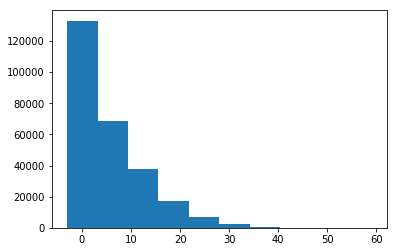

In [433]:
plt.hist(pg['fp_total'])

In [434]:
len(pg[pg['fp_total'] > 40])

211

In [435]:
pg['position'].value_counts()

WR    84038
RB    80325
TE    49318
QB    31031
K     22050
Name: position, dtype: int64

In [436]:
# make a column for field_goal_makes_pct

field_goal_makes_pct_list = []

for index, row in pg.iterrows():
    if row['field_goal_attempts'] != 0:
        field_goal_makes_pct_list.append(row['field_goal_makes'] / row['field_goal_attempts'])
    else:
        field_goal_makes_pct_list.append(0)
    
pg['field_goal_makes_pct'] = field_goal_makes_pct_list

In [437]:
# make a column for passing_completions_pct

passing_completions_pct_list = []

for index, row in pg.iterrows():
    if row['passing_attempts'] != 0:
        passing_completions_pct_list.append(row['passing_completions'] / row['passing_attempts'])
    else:
        passing_completions_pct_list.append(0)
    
pg['passing_completions_pct'] = passing_completions_pct_list

In [438]:
# make a column for point_after_makes_pct

point_after_makes_pct_list = []

for index, row in pg.iterrows():
    if row['point_after_attempts'] != 0:
        point_after_makes_pct_list.append(row['point_after_makes'] / row['point_after_attempts'])
    else:
        point_after_makes_pct_list.append(0)
    
pg['point_after_makes_pct'] = point_after_makes_pct_list

In [439]:
# make a column for receiving_receptions_pct

receiving_receptions_pct_list = []

for index, row in pg.iterrows():
    if row['receiving_targets'] != 0:
        receiving_receptions_pct_list.append(row['receiving_receptions'] / row['receiving_targets'])
    else:
        receiving_receptions_pct_list.append(0)
    
pg['receiving_receptions_pct'] = receiving_receptions_pct_list

In [440]:
# remove columns: 'field_goal_makes', 'passing_completions', 'field_goal_makes', 'receiving_receptions' 
# remove features that are not likely to be predictive of the target:
# birth_date, birth_place, college, high_school, game_location, game_number, total_punt_yards
# all fp metrics except for the target, 'fp_total' (due to perfect corr with the true stat)

pg = pg[['player_id', 'name', 'date', 'full_team', 'position', 'age', 'height', 'weight',
       'field_goal_attempts', 'field_goal_makes_pct',
       'game_won', 'opponent', 'full_opponent',
       'opponent_score', 'passing_attempts', 'passing_completions_pct',
       'passing_interceptions', 'passing_rating', 'passing_sacks',
       'passing_sacks_yards_lost', 'passing_touchdowns', 'passing_yards',
       'player_team_score', 'point_after_attempts', 'point_after_makes_pct',
       'receiving_receptions_pct', 'receiving_targets', 'receiving_touchdowns',
       'receiving_yards', 'rushing_attempts_x', 'rushing_touchdowns',
       'rushing_yards_x', 'fp_total', 'datetime', 'opposing_team',
       'Season', 'year_of_game', 'points_scored', 'opponent_points_scored',
       'pass_completions', 'pass_attempts', 'pass_yards', 'passing_tds',
       'interceptions', 'times_sacked', 'sack_yards_lost',
       'passing_yards_per_attempt', 'completion_percentage', 'qb_rating',
       'rushing_attempts_y', 'rushing_yards_y', 'rushing_yards_per_attempt',
       'rushing_tds', 'FGM', 'FGA', 'XPM', 'XPA', 'punts',
       'record', '1stDowns', 'TotYd', 'turnovers_lost', '1stDowns_allowed',
       'TotYd_allowed', 'PassY_allowed', 'RushY_allowed',
       'defensive_turnovers', 'win_pct']]

In [441]:
rolling_columns_list = ['field_goal_attempts', 'field_goal_makes_pct',
       'opponent_score', 'passing_attempts',
       'passing_completions_pct', 'passing_interceptions', 'passing_rating',
       'passing_sacks', 'passing_sacks_yards_lost', 'passing_touchdowns',
       'passing_yards', 'player_team_score', 'point_after_attempts',
       'point_after_makes_pct', 'receiving_receptions_pct',
       'receiving_targets', 'receiving_touchdowns', 'receiving_yards',
       'rushing_attempts_x', 'rushing_touchdowns', 'rushing_yards_x']

In [442]:
# print the current head of the df before converting the columns to rolling to make sure it worked
pg.head()

,player_id,name,date,date,full_team,position,age,height,weight,field_goal_attempts,field_goal_makes_pct,game_won,opponent,full_opponent,opponent_score,passing_attempts,passing_completions_pct,passing_interceptions,passing_rating,passing_sacks,passing_sacks_yards_lost,passing_touchdowns,passing_yards,player_team_score,point_after_attempts,point_after_makes_pct,receiving_receptions_pct,receiving_targets,receiving_touchdowns,receiving_yards,rushing_attempts_x,rushing_touchdowns,rushing_yards_x,fp_total,datetime,opposing_team,Season,year_of_game,points_scored,opponent_points_scored,pass_completions,pass_attempts,pass_yards,passing_tds,interceptions,times_sacked,sack_yards_lost,passing_yards_per_attempt,completion_percentage,qb_rating,rushing_attempts_y,rushing_yards_y,rushing_yards_per_attempt,rushing_tds,FGM,FGA,XPM,XPA,punts,record,1stDowns,TotYd,turnovers_lost,1stDowns_allowed,TotYd_allowed,PassY_allowed,RushY_allowed,defensive_turnovers,win_pct
0,18182,Steve Ramsey,1970-12-20,1970-12-20,New Orleans Saints,QB,22-242,6-2,210.0,0,0.0,False,CHI,Chicago Bears,24,2,0.000000,0,39.6,0,0,0,0,3,0,0.0,0.0,0,0,0,0,0,0,0.00,1970-12-20,Chicago Bears,1970.0,1970.0,17.846154,19.846154,14.153846,28.538462,146.230769,1.384615,1.384615,2.461538,19.230769,5.207692,48.576923,59.469231,25.615385,76.0,2.907692,0.230769,1.461538,2.461538,1.923077,1.923077,6.000,5-8-0,12.307692,222.230769,2.384615,17.307692,298.153846,188.692308,109.461538,2.076923,0.384615
1,18182,Steve Ramsey,1971-09-26,1971-09-26,Denver Broncos,QB,23-157,6-2,210.0,0,0.0,False,GNB,Green Bay Packers,34,8,0.875000,0,142.2,0,0,1,69,13,0,0.0,0.0,0,0,0,0,0,0,6.76,1971-09-26,Green Bay Packers,1971.0,1971.0,40.000000,42.000000,15.000000,26.000000,224.000000,3.000000,1.000000,0.000000,0.000000,8.600000,57.700000,108.500000,30.000000,124.0,4.100000,1.000000,1.000000,2.000000,5.000000,5.000000,4.000,0-1-0,17.000000,348.000000,5.000000,12.000000,323.000000,221.000000,102.000000,1.000000,0.000000
2,18182,Steve Ramsey,1971-10-10,1971-10-10,Denver Broncos,QB,23-171,6-2,210.0,0,0.0,False,OAK,Oakland Raiders,27,16,0.375000,2,40.1,0,0,1,98,16,0,0.0,0.0,0,0,0,0,0,0,8.00,1971-10-10,Oakland Raiders,1971.0,1971.0,24.666667,13.333333,11.333333,23.666667,140.666667,1.333333,0.666667,2.000000,18.666667,6.466667,50.366667,82.133333,34.333333,195.0,5.733333,1.666667,1.333333,1.666667,2.666667,2.666667,5.000,2-1-0,20.000000,335.666667,2.333333,15.000000,273.666667,152.666667,121.000000,3.666667,0.666667
3,18182,Steve Ramsey,1971-10-24,1971-10-24,Denver Broncos,QB,23-185,6-2,210.0,0,0.0,True,CLE,Cleveland Browns,0,0,0.000000,0,0.0,0,0,0,0,27,0,0.0,0.0,0,0,0,0,0,0,0.00,1971-10-24,Cleveland Browns,1971.0,1971.0,23.800000,17.600000,16.600000,30.600000,204.000000,1.000000,1.600000,1.400000,13.000000,6.700000,54.980000,63.440000,36.600000,115.4,3.120000,1.800000,1.400000,2.800000,2.800000,2.800000,4.200,4-1-0,19.200000,319.400000,3.000000,13.800000,262.000000,125.600000,136.400000,3.800000,0.800000
4,18182,Steve Ramsey,1971-11-14,1971-11-14,Denver Broncos,QB,23-206,6-2,210.0,0,0.0,False,CIN,Cincinnati Bengals,24,13,0.461538,1,68.1,0,0,1,106,10,0,0.0,0.0,0,0,0,0,0,0,8.28,1971-11-14,Cincinnati Bengals,1971.0,1971.0,17.500000,19.375000,13.750000,25.875000,124.000000,0.875000,0.875000,3.750000,28.875000,4.425000,51.787500,63.012500,30.750000,142.5,4.387500,0.625000,1.750000,2.750000,1.750000,1.750000,6.125,1-7-0,14.750000,266.500000,1.375000,15.750000,282.750000,155.125000,127.625000,2.750000,0.125000


In [443]:
def convert_to_rolling(list_of_columns, dataframe):
    """Takes a list of columns, and converts its rows to a rolling mean of the previous three rows"""
    for column in list_of_columns:
        dataframe[column] = dataframe.groupby(['name', 'Season'])[column].apply(lambda x: x.rolling(window=3).mean())
        dataframe[column] = dataframe[column].shift(1)

In [444]:
pg.head()

,player_id,name,date,date,full_team,position,age,height,weight,field_goal_attempts,field_goal_makes_pct,game_won,opponent,full_opponent,opponent_score,passing_attempts,passing_completions_pct,passing_interceptions,passing_rating,passing_sacks,passing_sacks_yards_lost,passing_touchdowns,passing_yards,player_team_score,point_after_attempts,point_after_makes_pct,receiving_receptions_pct,receiving_targets,receiving_touchdowns,receiving_yards,rushing_attempts_x,rushing_touchdowns,rushing_yards_x,fp_total,datetime,opposing_team,Season,year_of_game,points_scored,opponent_points_scored,pass_completions,pass_attempts,pass_yards,passing_tds,interceptions,times_sacked,sack_yards_lost,passing_yards_per_attempt,completion_percentage,qb_rating,rushing_attempts_y,rushing_yards_y,rushing_yards_per_attempt,rushing_tds,FGM,FGA,XPM,XPA,punts,record,1stDowns,TotYd,turnovers_lost,1stDowns_allowed,TotYd_allowed,PassY_allowed,RushY_allowed,defensive_turnovers,win_pct
0,18182,Steve Ramsey,1970-12-20,1970-12-20,New Orleans Saints,QB,22-242,6-2,210.0,0,0.0,False,CHI,Chicago Bears,24,2,0.000000,0,39.6,0,0,0,0,3,0,0.0,0.0,0,0,0,0,0,0,0.00,1970-12-20,Chicago Bears,1970.0,1970.0,17.846154,19.846154,14.153846,28.538462,146.230769,1.384615,1.384615,2.461538,19.230769,5.207692,48.576923,59.469231,25.615385,76.0,2.907692,0.230769,1.461538,2.461538,1.923077,1.923077,6.000,5-8-0,12.307692,222.230769,2.384615,17.307692,298.153846,188.692308,109.461538,2.076923,0.384615
1,18182,Steve Ramsey,1971-09-26,1971-09-26,Denver Broncos,QB,23-157,6-2,210.0,0,0.0,False,GNB,Green Bay Packers,34,8,0.875000,0,142.2,0,0,1,69,13,0,0.0,0.0,0,0,0,0,0,0,6.76,1971-09-26,Green Bay Packers,1971.0,1971.0,40.000000,42.000000,15.000000,26.000000,224.000000,3.000000,1.000000,0.000000,0.000000,8.600000,57.700000,108.500000,30.000000,124.0,4.100000,1.000000,1.000000,2.000000,5.000000,5.000000,4.000,0-1-0,17.000000,348.000000,5.000000,12.000000,323.000000,221.000000,102.000000,1.000000,0.000000
2,18182,Steve Ramsey,1971-10-10,1971-10-10,Denver Broncos,QB,23-171,6-2,210.0,0,0.0,False,OAK,Oakland Raiders,27,16,0.375000,2,40.1,0,0,1,98,16,0,0.0,0.0,0,0,0,0,0,0,8.00,1971-10-10,Oakland Raiders,1971.0,1971.0,24.666667,13.333333,11.333333,23.666667,140.666667,1.333333,0.666667,2.000000,18.666667,6.466667,50.366667,82.133333,34.333333,195.0,5.733333,1.666667,1.333333,1.666667,2.666667,2.666667,5.000,2-1-0,20.000000,335.666667,2.333333,15.000000,273.666667,152.666667,121.000000,3.666667,0.666667
3,18182,Steve Ramsey,1971-10-24,1971-10-24,Denver Broncos,QB,23-185,6-2,210.0,0,0.0,True,CLE,Cleveland Browns,0,0,0.000000,0,0.0,0,0,0,0,27,0,0.0,0.0,0,0,0,0,0,0,0.00,1971-10-24,Cleveland Browns,1971.0,1971.0,23.800000,17.600000,16.600000,30.600000,204.000000,1.000000,1.600000,1.400000,13.000000,6.700000,54.980000,63.440000,36.600000,115.4,3.120000,1.800000,1.400000,2.800000,2.800000,2.800000,4.200,4-1-0,19.200000,319.400000,3.000000,13.800000,262.000000,125.600000,136.400000,3.800000,0.800000
4,18182,Steve Ramsey,1971-11-14,1971-11-14,Denver Broncos,QB,23-206,6-2,210.0,0,0.0,False,CIN,Cincinnati Bengals,24,13,0.461538,1,68.1,0,0,1,106,10,0,0.0,0.0,0,0,0,0,0,0,8.28,1971-11-14,Cincinnati Bengals,1971.0,1971.0,17.500000,19.375000,13.750000,25.875000,124.000000,0.875000,0.875000,3.750000,28.875000,4.425000,51.787500,63.012500,30.750000,142.5,4.387500,0.625000,1.750000,2.750000,1.750000,1.750000,6.125,1-7-0,14.750000,266.500000,1.375000,15.750000,282.750000,155.125000,127.625000,2.750000,0.125000


In [445]:
convert_to_rolling(rolling_columns_list, pg)
pg.head()

,player_id,name,date,date,full_team,position,age,height,weight,field_goal_attempts,field_goal_makes_pct,game_won,opponent,full_opponent,opponent_score,passing_attempts,passing_completions_pct,passing_interceptions,passing_rating,passing_sacks,passing_sacks_yards_lost,passing_touchdowns,passing_yards,player_team_score,point_after_attempts,point_after_makes_pct,receiving_receptions_pct,receiving_targets,receiving_touchdowns,receiving_yards,rushing_attempts_x,rushing_touchdowns,rushing_yards_x,fp_total,datetime,opposing_team,Season,year_of_game,points_scored,opponent_points_scored,pass_completions,pass_attempts,pass_yards,passing_tds,interceptions,times_sacked,sack_yards_lost,passing_yards_per_attempt,completion_percentage,qb_rating,rushing_attempts_y,rushing_yards_y,rushing_yards_per_attempt,rushing_tds,FGM,FGA,XPM,XPA,punts,record,1stDowns,TotYd,turnovers_lost,1stDowns_allowed,TotYd_allowed,PassY_allowed,RushY_allowed,defensive_turnovers,win_pct
0,18182,Steve Ramsey,1970-12-20,1970-12-20,New Orleans Saints,QB,22-242,6-2,210.0,NaN,NaN,False,CHI,Chicago Bears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1970-12-20,Chicago Bears,1970.0,1970.0,17.846154,19.846154,14.153846,28.538462,146.230769,1.384615,1.384615,2.461538,19.230769,5.207692,48.576923,59.469231,25.615385,76.0,2.907692,0.230769,1.461538,2.461538,1.923077,1.923077,6.000,5-8-0,12.307692,222.230769,2.384615,17.307692,298.153846,188.692308,109.461538,2.076923,0.384615
1,18182,Steve Ramsey,1971-09-26,1971-09-26,Denver Broncos,QB,23-157,6-2,210.0,NaN,NaN,False,GNB,Green Bay Packers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.76,1971-09-26,Green Bay Packers,1971.0,1971.0,40.000000,42.000000,15.000000,26.000000,224.000000,3.000000,1.000000,0.000000,0.000000,8.600000,57.700000,108.500000,30.000000,124.0,4.100000,1.000000,1.000000,2.000000,5.000000,5.000000,4.000,0-1-0,17.000000,348.000000,5.000000,12.000000,323.000000,221.000000,102.000000,1.000000,0.000000
2,18182,Steve Ramsey,1971-10-10,1971-10-10,Denver Broncos,QB,23-171,6-2,210.0,NaN,NaN,False,OAK,Oakland Raiders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.00,1971-10-10,Oakland Raiders,1971.0,1971.0,24.666667,13.333333,11.333333,23.666667,140.666667,1.333333,0.666667,2.000000,18.666667,6.466667,50.366667,82.133333,34.333333,195.0,5.733333,1.666667,1.333333,1.666667,2.666667,2.666667,5.000,2-1-0,20.000000,335.666667,2.333333,15.000000,273.666667,152.666667,121.000000,3.666667,0.666667
3,18182,Steve Ramsey,1971-10-24,1971-10-24,Denver Broncos,QB,23-185,6-2,210.0,NaN,NaN,True,CLE,Cleveland Browns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1971-10-24,Cleveland Browns,1971.0,1971.0,23.800000,17.600000,16.600000,30.600000,204.000000,1.000000,1.600000,1.400000,13.000000,6.700000,54.980000,63.440000,36.600000,115.4,3.120000,1.800000,1.400000,2.800000,2.800000,2.800000,4.200,4-1-0,19.200000,319.400000,3.000000,13.800000,262.000000,125.600000,136.400000,3.800000,0.800000
4,18182,Steve Ramsey,1971-11-14,1971-11-14,Denver Broncos,QB,23-206,6-2,210.0,0.0,0.0,False,CIN,Cincinnati Bengals,20.333333,8.0,0.416667,0.666667,60.766667,0.0,0.0,0.666667,55.666667,18.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.28,1971-11-14,Cincinnati Bengals,1971.0,1971.0,17.500000,19.375000,13.750000,25.875000,124.000000,0.875000,0.875000,3.750000,28.875000,4.425000,51.787500,63.012500,30.750000,142.5,4.387500,0.625000,1.750000,2.750000,1.750000,1.750000,6.125,1-7-0,14.750000,266.500000,1.375000,15.750000,282.750000,155.125000,127.625000,2.750000,0.125000


In [446]:
# Convert game_won to a sum of the previous three games won

pg['game_won'] = pg.groupby(['name','Season'])['game_won'].apply(lambda x: x.rolling(window=3).sum())
pg['game_won'] = pg['game_won'].shift(1)    
pg.head()

,player_id,name,date,date,full_team,position,age,height,weight,field_goal_attempts,field_goal_makes_pct,game_won,opponent,full_opponent,opponent_score,passing_attempts,passing_completions_pct,passing_interceptions,passing_rating,passing_sacks,passing_sacks_yards_lost,passing_touchdowns,passing_yards,player_team_score,point_after_attempts,point_after_makes_pct,receiving_receptions_pct,receiving_targets,receiving_touchdowns,receiving_yards,rushing_attempts_x,rushing_touchdowns,rushing_yards_x,fp_total,datetime,opposing_team,Season,year_of_game,points_scored,opponent_points_scored,pass_completions,pass_attempts,pass_yards,passing_tds,interceptions,times_sacked,sack_yards_lost,passing_yards_per_attempt,completion_percentage,qb_rating,rushing_attempts_y,rushing_yards_y,rushing_yards_per_attempt,rushing_tds,FGM,FGA,XPM,XPA,punts,record,1stDowns,TotYd,turnovers_lost,1stDowns_allowed,TotYd_allowed,PassY_allowed,RushY_allowed,defensive_turnovers,win_pct
0,18182,Steve Ramsey,1970-12-20,1970-12-20,New Orleans Saints,QB,22-242,6-2,210.0,NaN,NaN,NaN,CHI,Chicago Bears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1970-12-20,Chicago Bears,1970.0,1970.0,17.846154,19.846154,14.153846,28.538462,146.230769,1.384615,1.384615,2.461538,19.230769,5.207692,48.576923,59.469231,25.615385,76.0,2.907692,0.230769,1.461538,2.461538,1.923077,1.923077,6.000,5-8-0,12.307692,222.230769,2.384615,17.307692,298.153846,188.692308,109.461538,2.076923,0.384615
1,18182,Steve Ramsey,1971-09-26,1971-09-26,Denver Broncos,QB,23-157,6-2,210.0,NaN,NaN,NaN,GNB,Green Bay Packers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.76,1971-09-26,Green Bay Packers,1971.0,1971.0,40.000000,42.000000,15.000000,26.000000,224.000000,3.000000,1.000000,0.000000,0.000000,8.600000,57.700000,108.500000,30.000000,124.0,4.100000,1.000000,1.000000,2.000000,5.000000,5.000000,4.000,0-1-0,17.000000,348.000000,5.000000,12.000000,323.000000,221.000000,102.000000,1.000000,0.000000
2,18182,Steve Ramsey,1971-10-10,1971-10-10,Denver Broncos,QB,23-171,6-2,210.0,NaN,NaN,NaN,OAK,Oakland Raiders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.00,1971-10-10,Oakland Raiders,1971.0,1971.0,24.666667,13.333333,11.333333,23.666667,140.666667,1.333333,0.666667,2.000000,18.666667,6.466667,50.366667,82.133333,34.333333,195.0,5.733333,1.666667,1.333333,1.666667,2.666667,2.666667,5.000,2-1-0,20.000000,335.666667,2.333333,15.000000,273.666667,152.666667,121.000000,3.666667,0.666667
3,18182,Steve Ramsey,1971-10-24,1971-10-24,Denver Broncos,QB,23-185,6-2,210.0,NaN,NaN,NaN,CLE,Cleveland Browns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1971-10-24,Cleveland Browns,1971.0,1971.0,23.800000,17.600000,16.600000,30.600000,204.000000,1.000000,1.600000,1.400000,13.000000,6.700000,54.980000,63.440000,36.600000,115.4,3.120000,1.800000,1.400000,2.800000,2.800000,2.800000,4.200,4-1-0,19.200000,319.400000,3.000000,13.800000,262.000000,125.600000,136.400000,3.800000,0.800000
4,18182,Steve Ramsey,1971-11-14,1971-11-14,Denver Broncos,QB,23-206,6-2,210.0,0.0,0.0,1.0,CIN,Cincinnati Bengals,20.333333,8.0,0.416667,0.666667,60.766667,0.0,0.0,0.666667,55.666667,18.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.28,1971-11-14,Cincinnati Bengals,1971.0,1971.0,17.500000,19.375000,13.750000,25.875000,124.000000,0.875000,0.875000,3.750000,28.875000,4.425000,51.787500,63.012500,30.750000,142.5,4.387500,0.625000,1.750000,2.750000,1.750000,1.750000,6.125,1-7-0,14.750000,266.500000,1.375000,15.750000,282.750000,155.125000,127.625000,2.750000,0.125000


In [447]:
pg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266762 entries, 0 to 304447
Data columns (total 69 columns):
player_id                    266762 non-null int64
name                         266762 non-null object
date                         266762 non-null object
date                         266762 non-null object
full_team                    266762 non-null object
position                     266762 non-null object
age                          266762 non-null object
height                       266739 non-null object
weight                       266739 non-null float64
field_goal_attempts          217138 non-null float64
field_goal_makes_pct         217138 non-null float64
game_won                     217138 non-null float64
opponent                     266762 non-null object
full_opponent                266762 non-null object
opponent_score               217138 non-null float64
passing_attempts             217138 non-null float64
passing_completions_pct      217138 non-null float64

In [448]:
# make target variable the last column for convenience, remove 'height' and 'weight'
pg = pg[['name', 'date', 'player_id', 'full_team', 'position', 'age',
       'field_goal_attempts', 'field_goal_makes_pct', 'game_won',
       'opponent', 'full_opponent', 'opponent_score', 'passing_attempts',
       'passing_completions_pct', 'passing_interceptions', 'passing_rating',
       'passing_sacks', 'passing_sacks_yards_lost', 'passing_touchdowns',
       'passing_yards', 'player_team_score', 'point_after_attempts',
       'point_after_makes_pct', 'receiving_receptions_pct',
       'receiving_targets', 'receiving_touchdowns', 'receiving_yards',
       'rushing_attempts_x', 'rushing_touchdowns', 'rushing_yards_x',
       'datetime', 'opposing_team', 'Season', 'year_of_game',
       'points_scored', 'opponent_points_scored', 'pass_completions',
       'pass_attempts', 'pass_yards', 'passing_tds', 'interceptions',
       'times_sacked', 'sack_yards_lost', 'passing_yards_per_attempt',
       'completion_percentage', 'qb_rating', 'rushing_attempts_y',
       'rushing_yards_y', 'rushing_yards_per_attempt', 'rushing_tds', 'FGM',
       'FGA', 'XPM', 'XPA', 'punts', 'record', '1stDowns', 'TotYd',
       'turnovers_lost', '1stDowns_allowed', 'TotYd_allowed', 'PassY_allowed',
       'RushY_allowed', 'defensive_turnovers', 'win_pct', 'fp_total']]

In [449]:
pg.fillna(method='bfill', inplace=True)
pg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266762 entries, 0 to 304447
Data columns (total 67 columns):
name                         266762 non-null object
date                         266762 non-null object
date                         266762 non-null object
player_id                    266762 non-null int64
full_team                    266762 non-null object
position                     266762 non-null object
age                          266762 non-null object
field_goal_attempts          266762 non-null float64
field_goal_makes_pct         266762 non-null float64
game_won                     266762 non-null float64
opponent                     266762 non-null object
full_opponent                266762 non-null object
opponent_score               266762 non-null float64
passing_attempts             266762 non-null float64
passing_completions_pct      266762 non-null float64
passing_interceptions        266762 non-null float64
passing_rating               266762 non-null float6

In [450]:
# Assign X and y for machine learning
X = pg.drop('fp_total', axis=1)
y = pg.iloc[:,-1]

In [451]:
# Keep only the numeric (float64) columns for the RFR
X = X[['field_goal_attempts', 'field_goal_makes_pct', 'game_won',
       'opponent_score', 'passing_attempts',
       'passing_completions_pct', 'passing_interceptions', 'passing_rating',
       'passing_sacks', 'passing_sacks_yards_lost', 'passing_touchdowns',
       'passing_yards', 'player_team_score', 'point_after_attempts',
       'point_after_makes_pct', 'receiving_receptions_pct',
       'receiving_targets', 'receiving_touchdowns', 'receiving_yards',
       'rushing_attempts_x', 'rushing_touchdowns', 'rushing_yards_x',
       'Season', 'year_of_game', 'points_scored',
       'opponent_points_scored', 'pass_completions', 'pass_attempts',
       'pass_yards', 'passing_tds', 'interceptions', 'times_sacked',
       'sack_yards_lost', 'passing_yards_per_attempt', 'completion_percentage',
       'qb_rating', 'rushing_attempts_y', 'rushing_yards_y',
       'rushing_yards_per_attempt', 'rushing_tds', 'FGM', 'FGA', 'XPM', 'XPA',
       'punts', '1stDowns', 'TotYd', 'turnovers_lost',
       '1stDowns_allowed', 'TotYd_allowed', 'PassY_allowed', 'RushY_allowed',
       'defensive_turnovers', 'win_pct']]

In [452]:
# Machine Learning!

from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [453]:
# Perform Grid-Search
gsc = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        'max_depth': range(8,13),
        'n_estimators': (10, 50, 100)
    },
    cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X, y)
best_params = grid_result.best_params_

rfr = RandomForestRegressor(max_depth=best_params["max_depth"], 
                            n_estimators=best_params['n_estimators'], 
                            random_state=False, verbose=False)

# Perform K-Fold CV
scores = cross_val_score(rfr, X, y, cv=5, scoring='neg_mean_absolute_error')
predictions = cross_val_predict(rfr, X, y, cv=5)

In [454]:
print(scores)
print(predictions)

[-3.58931571 -3.59054201 -3.7327577  -3.69218082 -3.61109363]
[4.79824503 5.72910185 5.15623079 ... 1.47202918 1.23850449 1.58051464]


In [455]:
compare = pd.DataFrame({'actual':y, 'predictions':predictions})
compare

,actual,predictions
0,0.00,4.798245
1,6.76,5.729102
2,8.00,5.156231
3,0.00,4.974510
4,8.28,5.185461
5,9.36,5.399762
6,6.48,5.929929
7,3.32,10.423776
8,10.88,10.853180
9,12.84,8.710411


In [456]:
a = compare['actual']
b = compare['predictions']

compare['dif'] = abs(a - b) 
compare['pct_dif'] = (abs(a - b) / ((a + b)/2)) * 100

compare

,actual,predictions,dif,pct_dif
0,0.00,4.798245,4.798245,200.000000
1,6.76,5.729102,1.030898,16.508764
2,8.00,5.156231,2.843769,43.230759
3,0.00,4.974510,4.974510,200.000000
4,8.28,5.185461,3.094539,45.962617
5,9.36,5.399762,3.960238,53.662629
6,6.48,5.929929,0.550071,8.865013
7,3.32,10.423776,7.103776,103.374442
8,10.88,10.853180,0.026820,0.246811
9,12.84,8.710411,4.129589,38.324922


In [457]:
np.mean(compare['dif'])

3.643177574649597

In [458]:
np.median(compare['dif'])

2.4066377866903568